
Importing the Dependencies

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

Data Collection and Analysis

PIMA Diabetes Dataset

Here we read the csv file

In [ ]:
# loading the diabetes dataset to a pandas DataFrame
data=pd.read_csv("/content/diabetes.csv")

In [ ]:
# printing the first 5 rows of the dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


***Exploratory Data Analysis (EDA)***

In [ ]:
# number of rows and Columns in this dataset
data.shape

(768, 9)

In [ ]:
# getting the statistical measures of the data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [ ]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Here we count the number of zeros present in each **column**

In [ ]:
count = (data['Pregnancies'] == 0).sum()
print(count)

111


In [ ]:
count = (data['Glucose'] == 0).sum()
print(count)

5


In [ ]:
count = (data['BloodPressure'] == 0).sum()
print(count)

35


In [ ]:
count = (data['SkinThickness'] == 0).sum()
print(count)

227


In [ ]:
count = (data['Insulin'] == 0).sum()
print(count)

374


In [ ]:
count = (data['BMI'] == 0).sum()
print(count)

11


In [ ]:
count = (data['DiabetesPedigreeFunction'] == 0).sum()
print(count)

0


In [ ]:
count = (data['Age'] == 0).sum()
print(count)

0


Here we found mean of the **columns**

In [ ]:
df2 = data["Glucose"].mean()
print(df2)

120.89453125


In [ ]:
df2 = data["BloodPressure"].mean()
print(df2)

69.10546875


In [ ]:
df2 = data["SkinThickness"].mean()
print(df2)

20.536458333333332


In [ ]:
df2 = data["Insulin"].mean()
print(df2)

79.79947916666667


In [ ]:
df2 = data["BMI"].mean()
print(df2)

31.992578124999977


In [ ]:
df2 = data["DiabetesPedigreeFunction"].mean()
print(df2)

0.4718763020833327


In [ ]:
df2 = data["Age"].mean()
print(df2)

33.240885416666664


Here we replaced zero values with mean of that column

In [ ]:
data['Glucose'] = data['Glucose'].replace(0, 120.89453125)   

In [ ]:
data['BloodPressure'] = data['BloodPressure'].replace(0,69.10546875 )   

In [ ]:
data['SkinThickness'] = data['SkinThickness'].replace(0, 20.536458333333332)   

In [ ]:
data['Insulin'] = data['Insulin'].replace(0, 79.79947916666667)   

In [ ]:
data['BMI'] = data['BMI'].replace(0,31.992578124999977 )   

In [ ]:
data['DiabetesPedigreeFunction'] = data['DiabetesPedigreeFunction'].replace(0,0.4718763020833327 )   

In [ ]:
data['Age'] = data['Age'].replace(0,33.240885416666664 )   

Now we displayed the data

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [ ]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10.0,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2.0,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1.0,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1
767,1.0,93.0,70.0,31.000000,79.799479,30.4,0.315,23,0


Now let’s check that if our dataset have null values or not

In [ ]:
data.isnull().head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


Now let’s check the number of null values our dataset has

In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

***Data Visualization ***

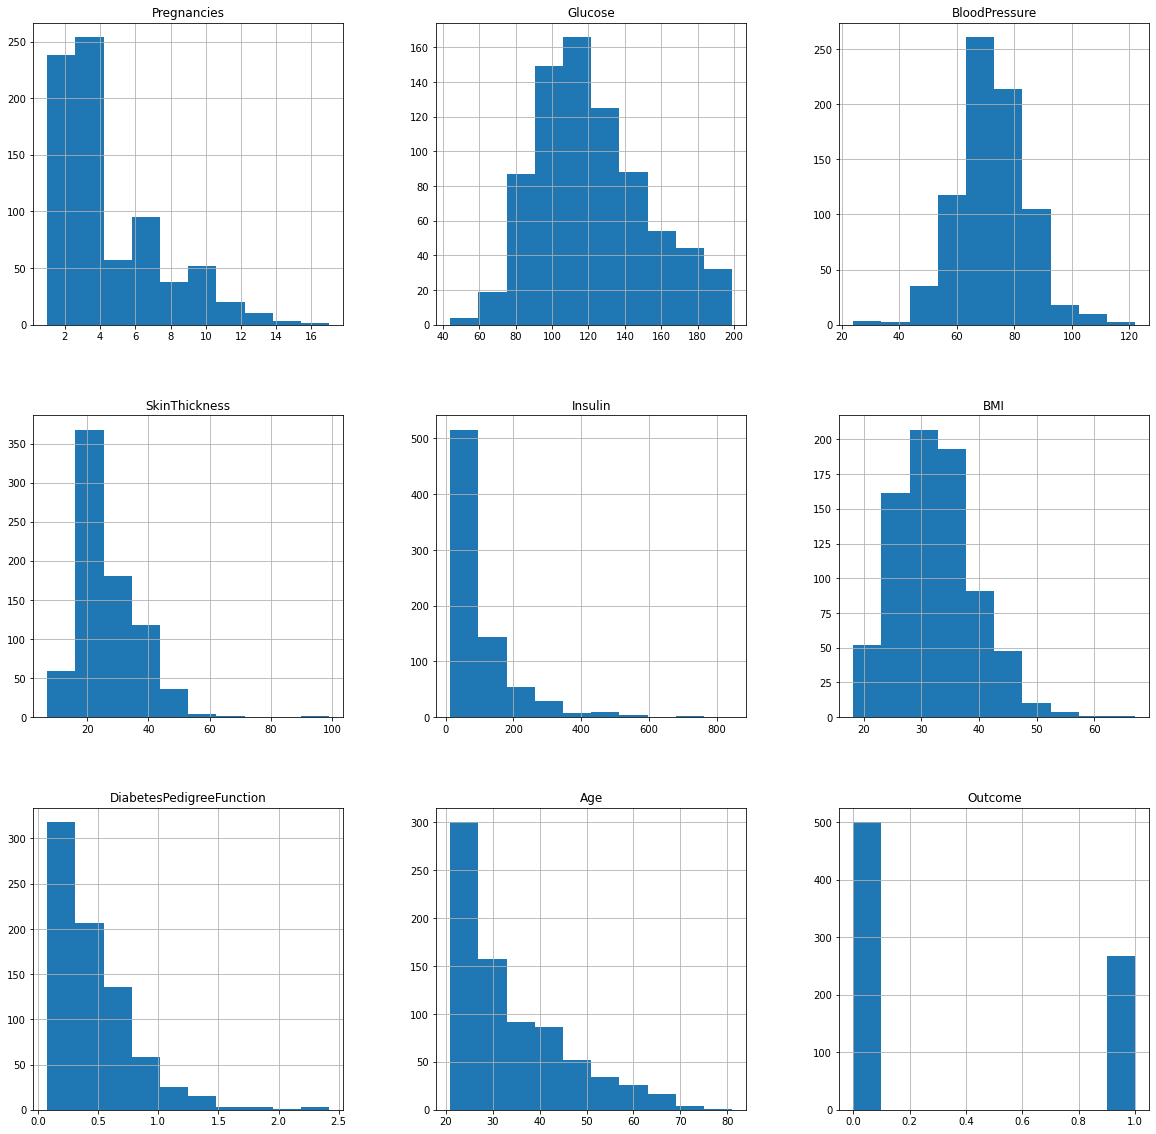

In [ ]:
#Plotting the distributions after replacing  with mean values.

p = data.hist(figsize = (20,20))

no null values in the dataset.

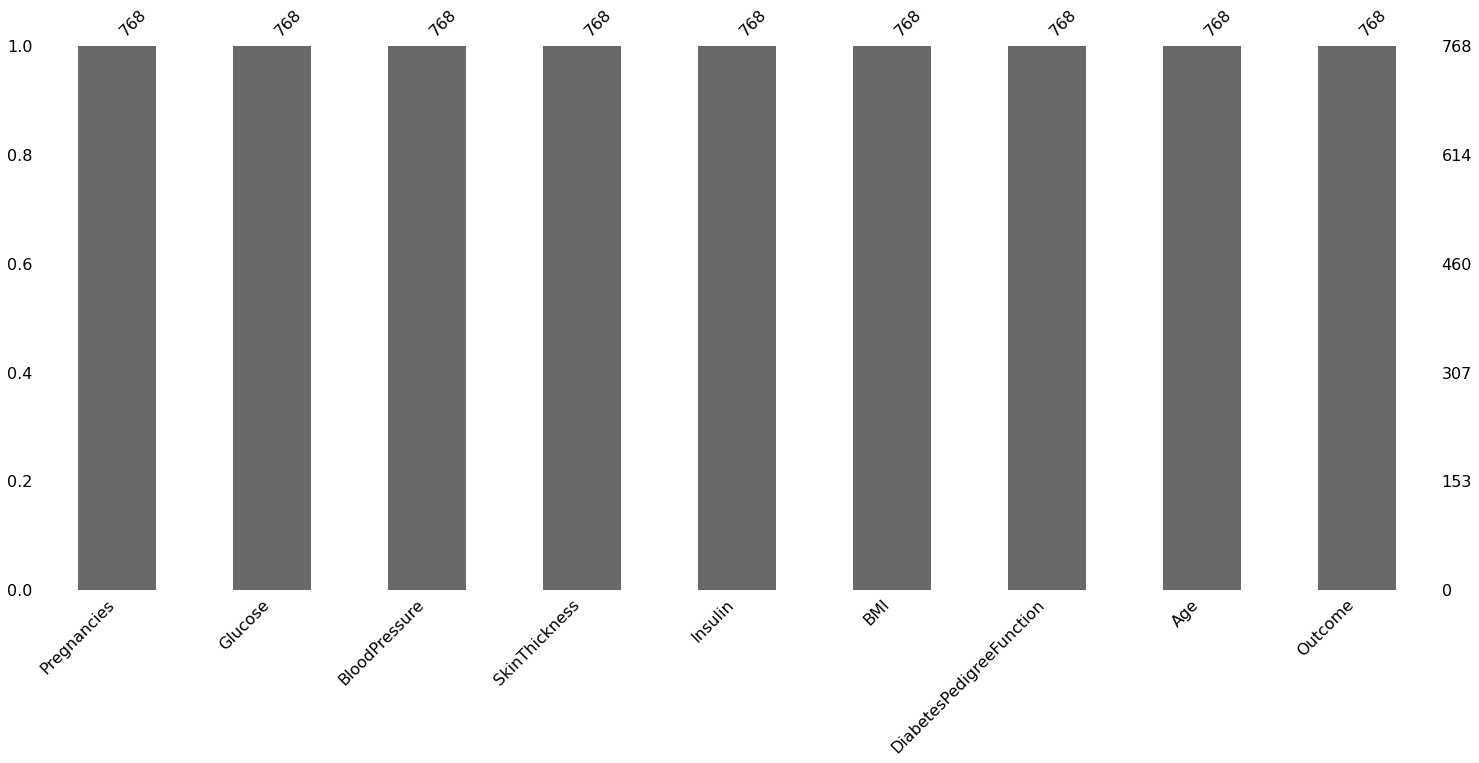

In [ ]:
#Plotting Null Count Analysis Plot

p = msno.bar(data)

let’s check that how well our outcome column is balanced

0    500
1    268
Name: Outcome, dtype: int64


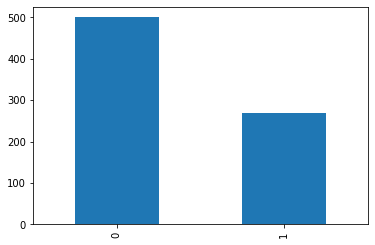

In [ ]:
print(data.Outcome.value_counts())
p=data.Outcome.value_counts().plot(kind="bar")

Distplot can be helpful where one will able to see the distribution of the data as well as with the help of boxplot one can see the outliers in that column

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


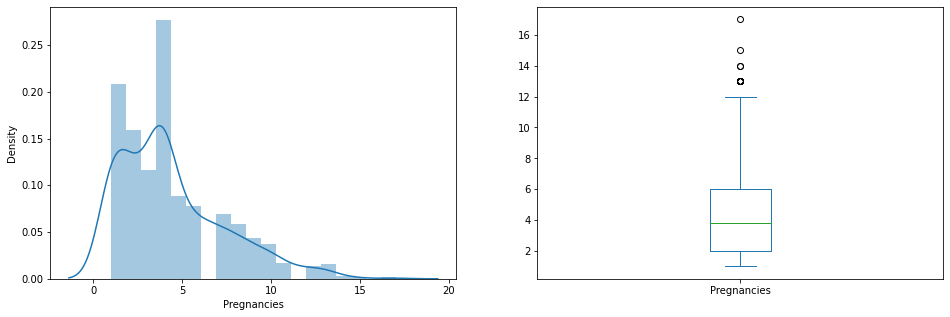

In [ ]:
plt.subplot(121), sns.distplot(data['Pregnancies'])
plt.subplot(122), data['Pregnancies'].plot.box(figsize=(16,5))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


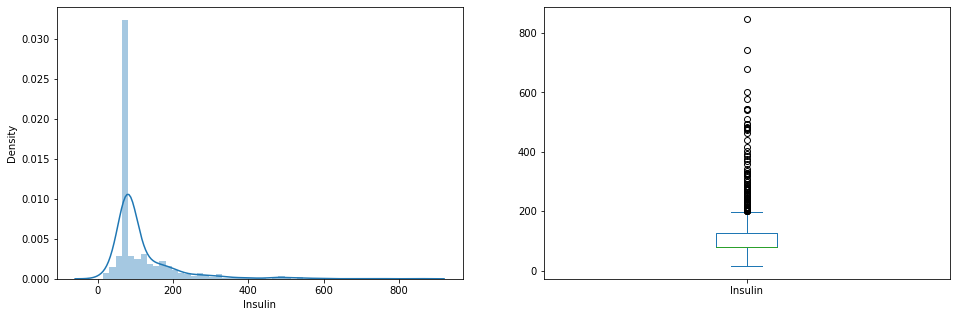

In [ ]:
plt.subplot(121), sns.distplot(data['Insulin'])
plt.subplot(122), data['Insulin'].plot.box(figsize=(16,5))
plt.show()

Correlation between all the features

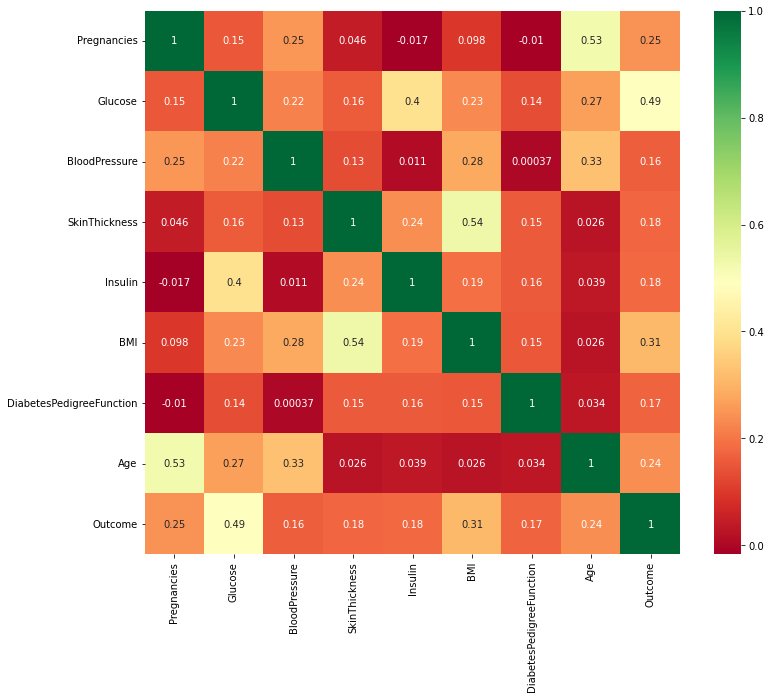

In [ ]:
plt.figure(figsize=(12,10))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn')

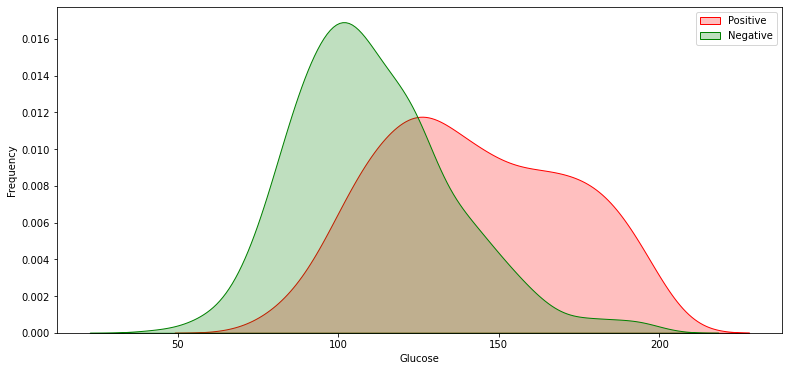

In [ ]:
# Explore Glucose vs Outcome
#The chances of diabetes is gradually increasing with level of Glucose.
plt.figure(figsize=(13,6))
g = sns.kdeplot(data ["Glucose"][data ["Outcome"] == 1], color="Red", shade = True)
g = sns.kdeplot(data ["Glucose"][data ["Outcome"] == 0], ax =g, color="Green", shade= True)
g.set_xlabel("Glucose")
g.set_ylabel("Frequency")
g.legend(["Positive","Negative"])

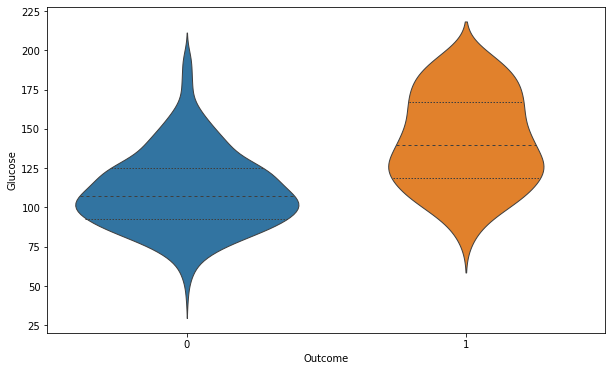

In [ ]:
# Explore Gluecose vs Outcome
plt.figure(figsize=(10,6))
sns.violinplot(data=data, x="Outcome", y="Glucose",
               split=True, inner="quart", linewidth=1)

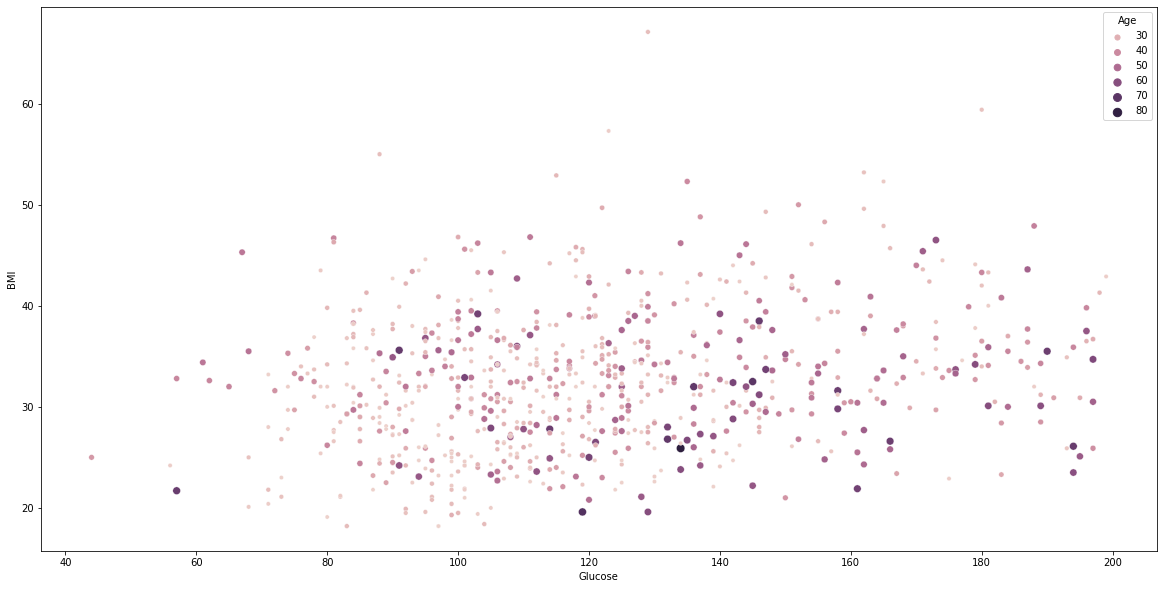

In [ ]:
# Glucose vs BMI vs Age

plt.figure(figsize=(20,10))
sns.scatterplot(data=data, x="Glucose", y="BMI", hue="Age", size="Age")

**Data Normalization**

x=Independent variable,
y=Dependent variable

Split the x and y

In [ ]:
x=data.iloc[:,0:8].values
y=data.iloc[:,8].values

In [ ]:
print(x)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [ ]:
print(y)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

Preprocessing Step

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/8,random_state=0)

**SVM CLASSIFIER**

In [ ]:
from sklearn.svm import SVC
c=SVC(kernel='linear',random_state=0)


In [ ]:
c.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

Here we predicted the outcome by passing all values

In [ ]:
input1=[[6,148,72,35,79.799479,33.6,0.627,50]]
input1=sc.transform(input1)
result=(c.predict(input1))
print(result)
if (result[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


In [ ]:
y_pred=c.predict(x_test)
expected=y_test

Here we got the accuracy as 86%

Model Evaluation

Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm = confusion_matrix(y_test, y_pred)
acc=accuracy_score(expected,y_pred)
print(acc)

0.8645833333333334


Graph of the Confusion Matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


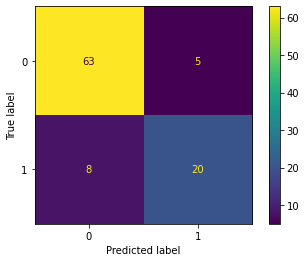

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(c, x_test, y_test)  
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        68
           1       0.80      0.71      0.75        28

    accuracy                           0.86        96
   macro avg       0.84      0.82      0.83        96
weighted avg       0.86      0.86      0.86        96



**KNN CLASSIFIER**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
c=KNeighborsClassifier(n_neighbors=8)


In [ ]:
c.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
input1=[[6,148,0,35,79.799479,33.6,0.627,50]]
input1=sc.transform(input1)
result=(c.predict(input1))
print(result)
if (result[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[0]
The person is not diabetic


In [ ]:
actual=c.predict(x_test)
expected=y_test


Model Evaluation

Accuracy Score

Here we got 80% accuracy

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm = confusion_matrix(y_test, y_pred)
accu=accuracy_score(expected,actual)
print(accu)

0.8020833333333334


Graph of the confusion matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


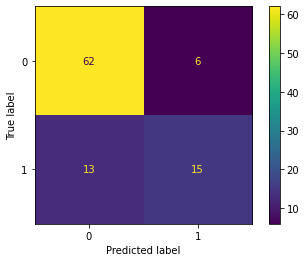

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(c, x_test, y_test)  
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,actual))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        68
           1       0.71      0.54      0.61        28

    accuracy                           0.80        96
   macro avg       0.77      0.72      0.74        96
weighted avg       0.79      0.80      0.79        96



**LINEAR REGRESSION**

In [ ]:
from sklearn.linear_model import LinearRegression
c=LinearRegression()

In [ ]:
c.fit(x,y)

LinearRegression()

In [ ]:
input1=[[6,148,72,35,79.799479,33.6,0.627,50]]
input1=sc.transform(input1)
result=(c.predict(input1))
print(result)
if (result[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[0.6381653]
The person is diabetic




Accuracy Score

Here we got 39% accuracy

In [ ]:
r2_score = c.score(x_test,y_test)
accur=(r2_score*100)
print(accur)

39.03152137237467


**Navie Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB
c = GaussianNB()
c.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred  =  c.predict(x_test)

In [ ]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
y_test

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
input1=[[10,101,76,48,180,32.9,0.177,63]]
input1=sc.transform(input1)
result=(c.predict(input1))
print(result)
if (result[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


Accuracy Score

Here we got 82% accuracy



In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
print(ac)

0.8229166666666666


Graph of confusion matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


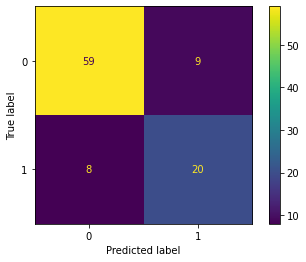

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(c, x_test, y_test)  
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87        68
           1       0.69      0.71      0.70        28

    accuracy                           0.82        96
   macro avg       0.79      0.79      0.79        96
weighted avg       0.82      0.82      0.82        96



**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
c = LogisticRegression()
c.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = c.predict(x_test)

Accuracy Score

Here we got 86% accuracy

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
cf = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 86.46%


In [ ]:
input1=[[10,101,76,48,180,32.9,0.177,63]]
input1=sc.transform(input1)
result=(c.predict(input1))
print(result)
if (result[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[0]
The person is not diabetic


Graph of confusion matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


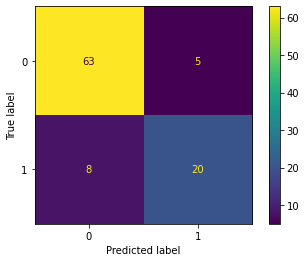

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(c, x_test, y_test)  
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        68
           1       0.80      0.71      0.75        28

    accuracy                           0.86        96
   macro avg       0.84      0.82      0.83        96
weighted avg       0.86      0.86      0.86        96



**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
c = DecisionTreeClassifier()
c.fit(x_train, y_train)
y_pred = c.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[56 12]
 [10 18]]


Graph of confusion matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


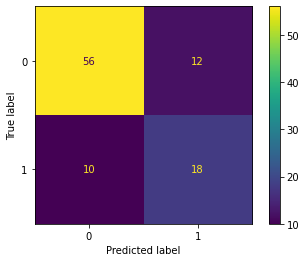

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(c, x_test, y_test)  
plt.show()

Accuracy Score

Here we got 79% accuracy

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7708333333333334

In [ ]:
input1=[[10,101,76,48,180,32.9,0.177,63]]
input1=sc.transform(input1)
result=(c.predict(input1))
print(result)
if (result[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[0]
The person is not diabetic


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        68
           1       0.60      0.64      0.62        28

    accuracy                           0.77        96
   macro avg       0.72      0.73      0.73        96
weighted avg       0.78      0.77      0.77        96



**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
c = RandomForestClassifier()

In [ ]:
c.fit(x_train, y_train)
y_pred = c.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[59  9]
 [ 8 20]]


Accuracy Score

Here we got 81% accuracy

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8229166666666666

Graph of confusion matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


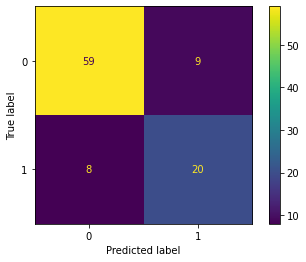

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(c, x_test, y_test)  
plt.show()

In [ ]:
input1=[[10,101,76,48,180,32.9,0.177,63]]
input1=sc.transform(input1)
result=(c.predict(input1))
print(result)
if (result[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[0]
The person is not diabetic


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87        68
           1       0.69      0.71      0.70        28

    accuracy                           0.82        96
   macro avg       0.79      0.79      0.79        96
weighted avg       0.82      0.82      0.82        96



Graph of algorithms

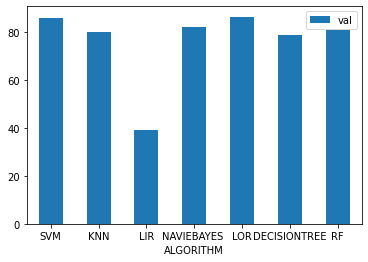

In [ ]:
df = pd.DataFrame({'ALGORITHM':['SVM', 'KNN', 'LIR','NAVIEBAYES ','LOR','DECISIONTREE','RF'], 'val':[86, 80, 39,82,86.5,79,81]})
ax = df.plot.bar(x='ALGORITHM', y='val', rot=0)

In [ ]:
from sklearn.metrics import classification_report
c.feature_importances_

array([0.0832585 , 0.2463931 , 0.08330048, 0.07102548, 0.07850619,
       0.16284233, 0.13255388, 0.14212003])

In [ ]:
X =  pd.DataFrame(columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'B

MI', 'DiabetesPedigreeFunction', 'Age'])
(pd.Series(c.feature_importances_, index=X.columns).plot(kind='barh'))

SyntaxError: ignored